In [88]:
library(lubridate) # For handling Date variables
library(ggplot2)
library(scales) # For percent_format()
library(RColorBrewer)
library(TTR) # for EMA (Exponential Moving Average)
library(cowplot)

In [143]:
library(ggpubr)
theme_set(theme_pubr())

In [82]:
df_dist1 <- read.csv(file="Meteo_2015.csv", sep=",", header=TRUE, stringsAsFactors=FALSE)

In [83]:
str(df_dist1)

'data.frame':	52559 obs. of  36 variables:
 $ TIMESTAMP                                       : chr  "1/1/2015" "1/1/2015" "1/1/2015" "1/1/2015" ...
 $ Time                                            : chr  " 0:00" " 0:10" " 0:20" " 0:30" ...
 $ Year                                            : int  2014 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ Month                                           : chr  "Diciembre" "Enero" "Enero" "Enero" ...
 $ DOY                                             : int  365 1 1 1 1 1 1 1 1 1 ...
 $ Hour                                            : num  24 0.5 0.5 0.5 1 1 1 1.5 1.5 1.5 ...
 $ RECORD                                          : int  27937 27938 27939 27940 27941 27942 27943 27944 27945 27946 ...
 $ BattV_Min                                       : num  12.1 12.1 12.1 12.1 12.1 ...
 $ AirTC_Avg                                       : num  11.5 11.6 11.7 11.8 11.8 ...
 $ RH                                              : num  78.3 75.4 74.6

In [84]:
df_dist1$NewDate <- as.POSIXct(paste0(df_dist1$TIMESTAMP, df_dist1$Time),format="%m/%d/%Y %H:%M")
df_dist1$NMonth <- factor(month(df_dist1$NewDate),
                         labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))

In [85]:
str(df_dist1)

'data.frame':	52559 obs. of  38 variables:
 $ TIMESTAMP                                       : chr  "1/1/2015" "1/1/2015" "1/1/2015" "1/1/2015" ...
 $ Time                                            : chr  " 0:00" " 0:10" " 0:20" " 0:30" ...
 $ Year                                            : int  2014 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ Month                                           : chr  "Diciembre" "Enero" "Enero" "Enero" ...
 $ DOY                                             : int  365 1 1 1 1 1 1 1 1 1 ...
 $ Hour                                            : num  24 0.5 0.5 0.5 1 1 1 1.5 1.5 1.5 ...
 $ RECORD                                          : int  27937 27938 27939 27940 27941 27942 27943 27944 27945 27946 ...
 $ BattV_Min                                       : num  12.1 12.1 12.1 12.1 12.1 ...
 $ AirTC_Avg                                       : num  11.5 11.6 11.7 11.8 11.8 ...
 $ RH                                              : num  78.3 75.4 74.6

In [86]:
df <- df_dist1[c(37,38,9,10,11,18,20,21)]
names(df) <- c("NDate", "Month", "AirTemp", "RH", "Precip", "NetRad", "InRad", "SoilT10")
df$InRad <- as.numeric(df$InRad)

In [87]:
str(df)

'data.frame':	52559 obs. of  8 variables:
 $ NDate  : POSIXct, format: "2015-01-01 00:00:00" "2015-01-01 00:10:00" ...
 $ Month  : Factor w/ 12 levels "Jan","Feb","Mar",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ AirTemp: num  11.5 11.6 11.7 11.8 11.8 ...
 $ RH     : num  78.3 75.4 74.6 72.5 72.6 ...
 $ Precip : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NetRad : num  -53.2 -62.6 -64.6 -71.4 -73.5 ...
 $ InRad  : num  0 1 3 3 1 0 0 0 0 0 ...
 $ SoilT10: num  14.1 14.2 14.2 14.2 14.2 ...


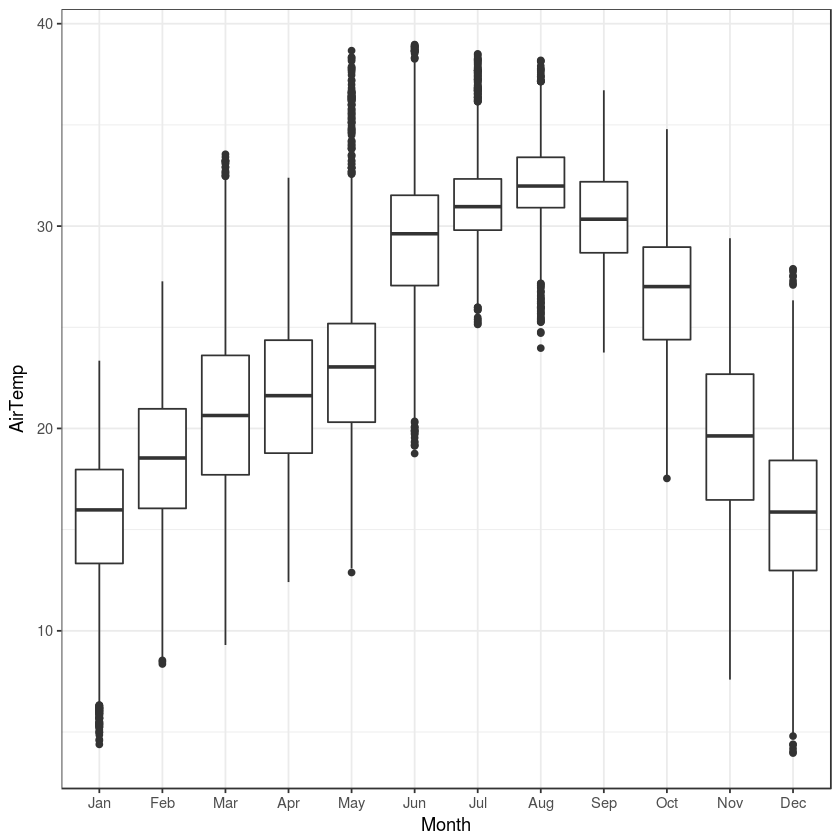

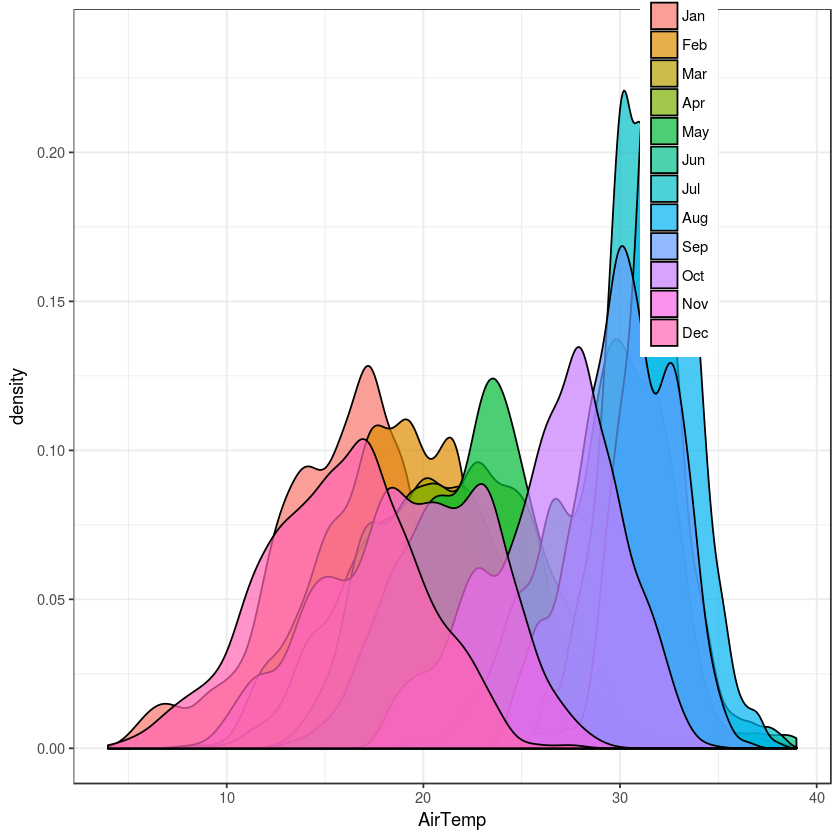

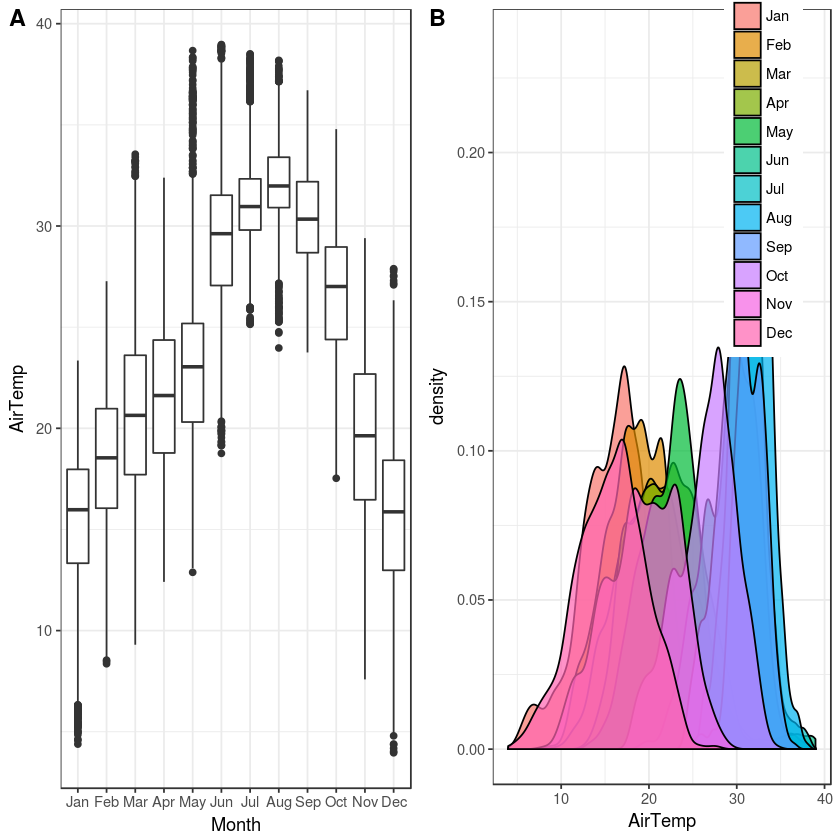

In [147]:
airTemp1 <- ggplot(df, aes(x = Month, y = AirTemp)) +
  geom_boxplot() + theme_bw()

airTemp2 <- ggplot(df, aes(x = AirTemp, fill = Month)) +
  geom_density(alpha = 0.7) + theme_bw() +
  theme(legend.position = c(0.8, 0.8))

airTemp1
airTemp2

plot_grid(airTemp1, airTemp2, labels = "AUTO") 

In [92]:
summary(df$AirTemp)
sd(df$AirTemp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.958  18.290  23.590  23.661  29.740  38.970 

[1] 6.677221

In [95]:
summary(df$SoilT10)
sd(df$SoilT10)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.88   18.38   22.92   23.09   28.71   33.97 

[1] 5.70363

In [156]:
summary(df$RH)
sd(df$RH)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.844  47.040  60.130  58.367  70.350  94.200 

[1] 16.8076

In [165]:
summary(df$NetRad)
sd(df$NetRad)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-298.80  -56.52  -25.64  126.56  298.40  922.00 

[1] 250.1375

Warning message:
“Removed 708 rows containing non-finite values (stat_boxplot).”

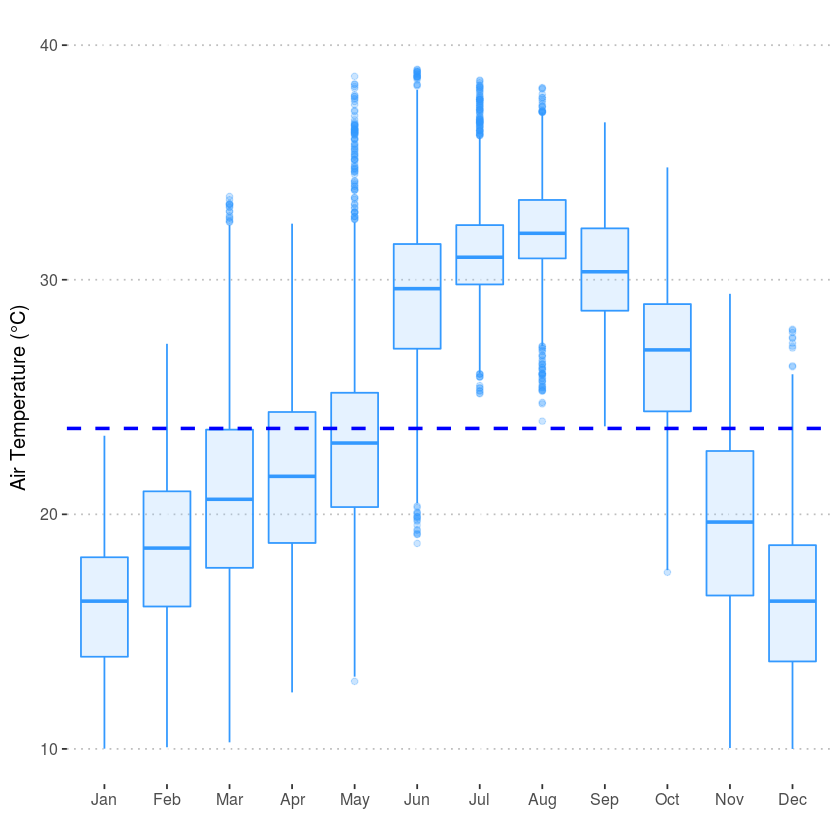

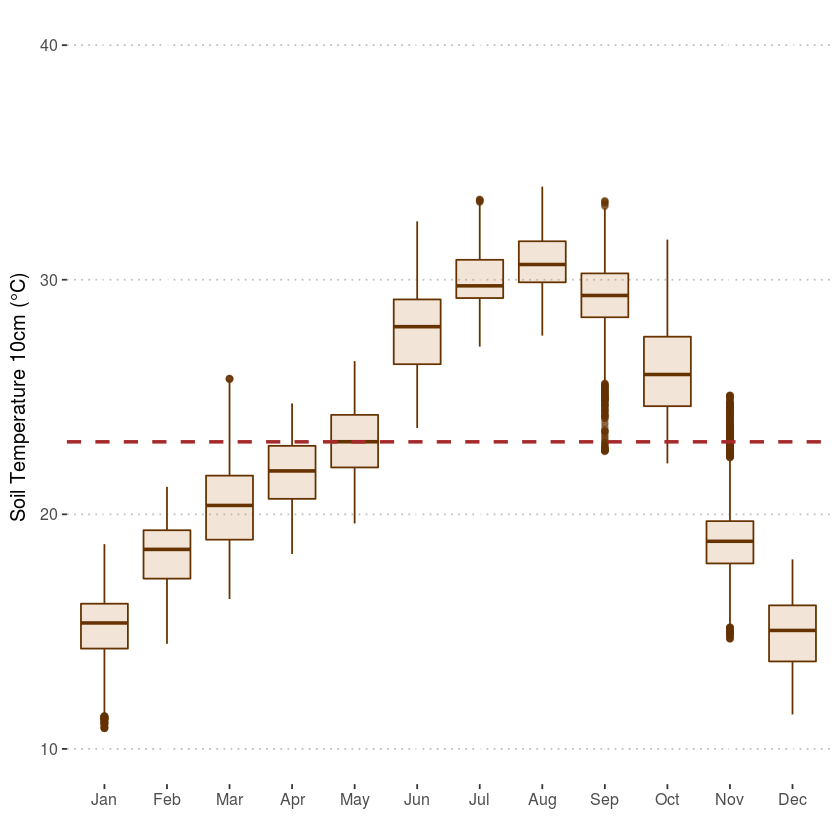

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”

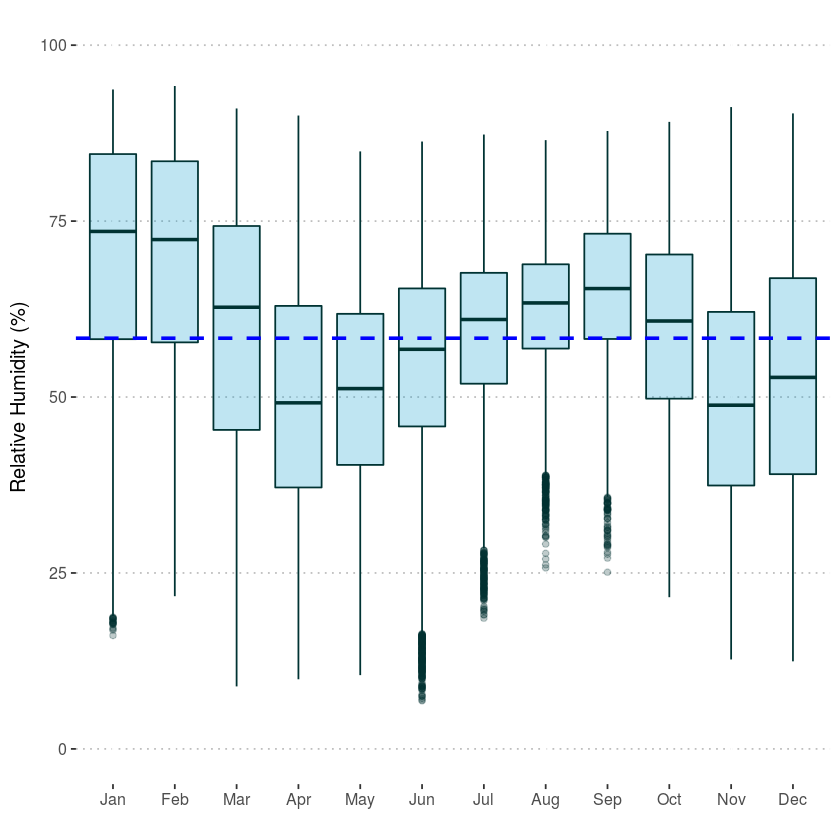

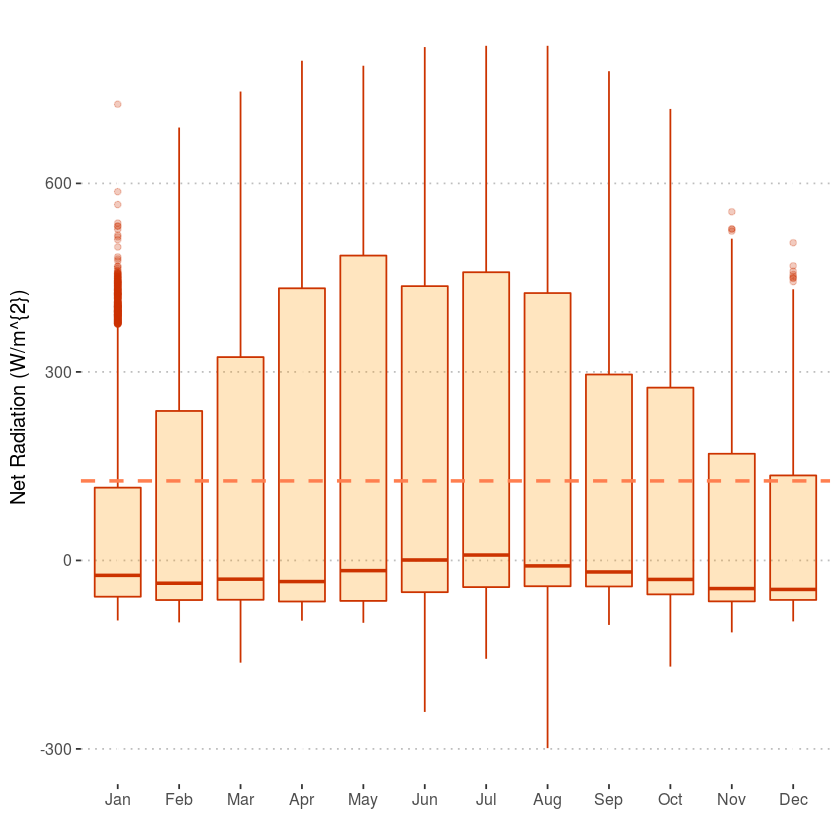

In [186]:
fill <- "#99CCFF"
line <- "#3399FF"
airT <- ggplot(df, aes(x = Month, y = AirTemp)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
        # scale_x_discrete(name = "Month") +
       # ggtitle("Air Temperature") +
        geom_hline(yintercept=23.661, linetype="dashed", color = "blue", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="", y="Air Temperature (°C)") 
       # geom_text(x=8, y=20, label="Ave Temp = 23.661", aes(fontface=1)) 

fill <- "#CC9966"
line <- "#663300"
soilT <- ggplot(df, aes(x = Month, y = SoilT10)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
       #ggtitle("Soil Temperature 10cm") +
        geom_hline(yintercept=23.09, linetype="dashed", color = "brown", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="", y="Soil Temperature 10cm (°C)")

fill <- "#0099CC"
line <- "#003333"
relH <- ggplot(df, aes(x = Month, y = RH)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
       # ggtitle("Relative Humidity") +
        geom_hline(yintercept=58.36, linetype="dashed", color = "blue", size=1.0) +
        ylim(0, 100) + theme_pubclean() +
        labs(x="", y="Relative Humidity (%)")

fill <- "#FF9900"
line <- "#CC3300"
netRad <- ggplot(df, aes(x = Month, y = NetRad)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
        # ggtitle("Net Radiation") +
        geom_hline(yintercept=126.56, linetype="dashed", color = "coral", size=1.0) +
        ylim(-300, 820) + theme_pubclean() +
        labs(x="", y="Net Radiation (W/m^{2})")

airT
soilT
relH
netRad

#plot_grid(airT, soilT, labels = "AUTO")

In [127]:
MoP<- aggregate(df[c("Precip")], 
                         by = df[c("Month")],
                         FUN=sum, na.rm=TRUE)


In [128]:
str(MoP)

'data.frame':	12 obs. of  2 variables:
 $ Month : Factor w/ 12 levels "Jan","Feb","Mar",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Precip: num  0 0.762 0 2.54 1.27 ...


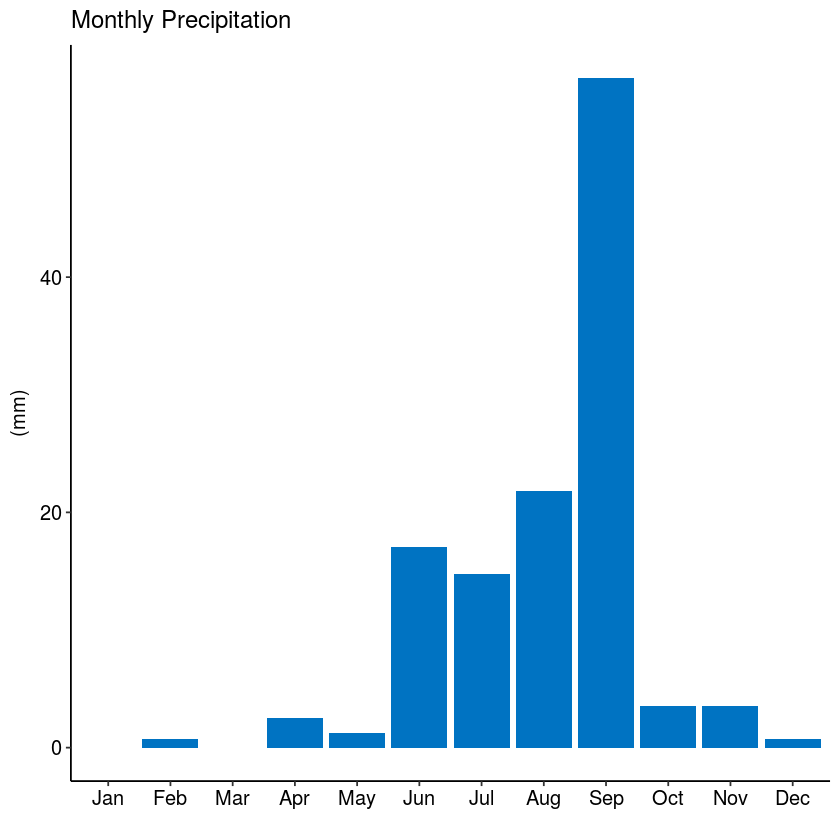

In [150]:
ggplot(MoP, aes(x = Month, y = Precip)) +
  geom_bar(fill = "#0073C2FF", stat = "identity") +
 labs(title="Monthly Precipitation") +
  labs(x="", y="(mm)") 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

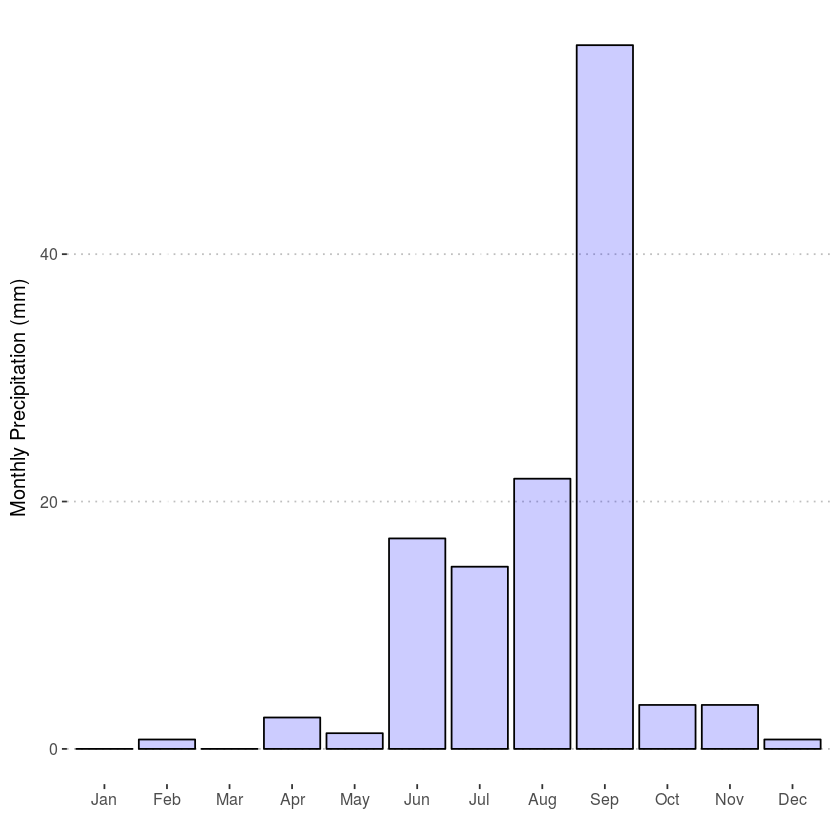

In [173]:
ggplot(data=MoP, aes(x=MoP$Month, y=MoP$Precip)) + 
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity") + 
  #labs(title="Monthly Precipitation") +
  labs(x="", y="Monthly Precipitation (mm)") + theme_pubclean()

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

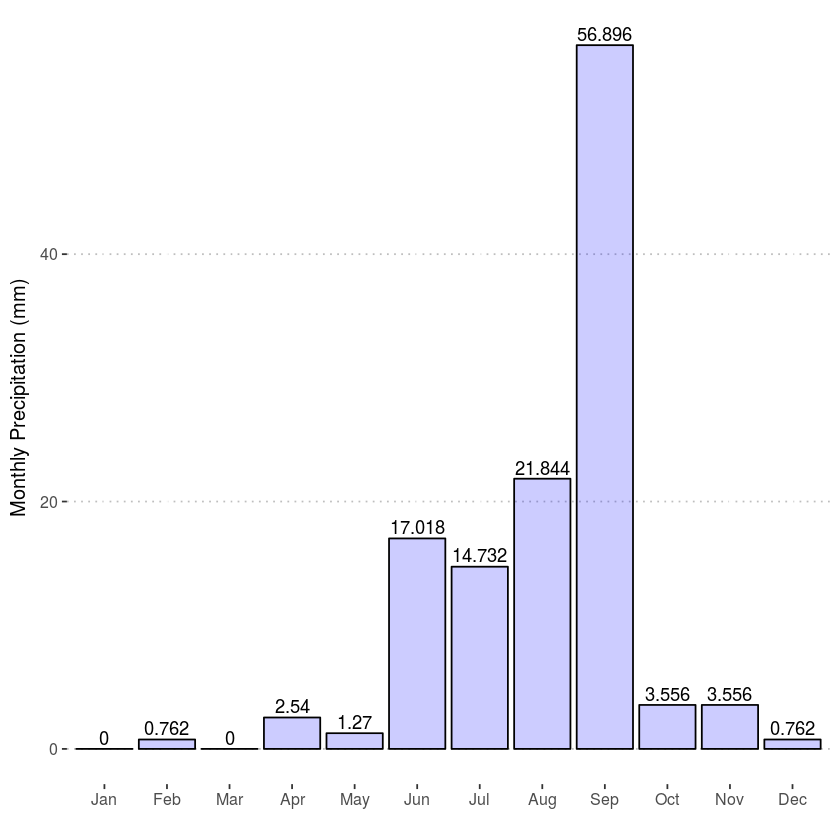

In [174]:
ggplot(MoP, aes(x = Month, y = Precip)) +
  # geom_bar(fill = "#0073C2FF", stat = "identity") +
  geom_text(aes(label = Precip), vjust = -0.3) + 
  labs(x="", y="Monthly Precipitation (mm)") + theme_pubclean() +
  #labs(title="Monthly Precipitation") +
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity")